# Regularized Linear Regression
---

In [21]:
# Importamos las librerias a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from Functions import uninum, unicat, binum, bicat, multiV
import openpyxl
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import GridSearchCV

### 1. Obtenemos el Conjunto de Datos, analisis descriptivo y ETL

In [6]:
df = pd.read_csv('/workspaces/P17-Regresion-Lineal-Regularizada/data/raw/demographic_health_data.csv')
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), str(2)
memory usage: 2.6 MB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
list(df.columns)

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

In [103]:
df['diabetes_prevalence'].describe()

count    3140.000000
mean       13.073503
std         2.724351
min         6.100000
25%        11.200000
50%        12.800000
75%        14.800000
max        25.600000
Name: diabetes_prevalence, dtype: float64

Del siguiente DataSet, se pretende crear un modelo de regresion lineal regularizada en donde se determine la probabilidad de prevalecencia de diabetes en funcion de datos socio demograficos.

In [26]:
# Separacion de Varibales Numericas y Categoricas
dsnum = df.select_dtypes(include='number')
dscat = df.select_dtypes(include='str')

dscatenc = dscat.apply(lambda x: pd.factorize(x)[0])
total_df = pd.concat([dsnum, dscatenc])

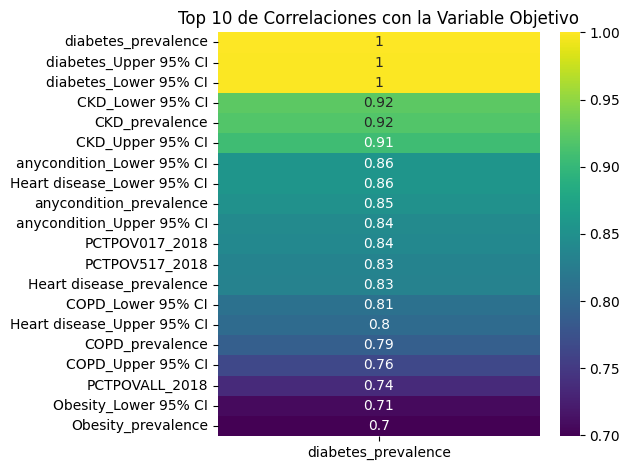

In [27]:
corrbanda = total_df.corr()['diabetes_prevalence'].sort_values(ascending=False)

corrbanda_frame = corrbanda.to_frame().head(20)

sns.heatmap(corrbanda_frame, annot=True, cmap='viridis', cbar=True)
plt.title('Top 10 de Correlaciones con la Variable Objetivo')

plt.tight_layout()
plt.show()

In [ ]:
#Definicion del Nuevo Data Set de Trabajo. Se descartan columnas de metricas resultante y colinealidades
dr = df[['Percent of Population Aged 60+', '70-79 y/o % of total pop', 'Urban_rural_code','% Black-alone','Percent of adults with a high school diploma only 2014-18','Unemployment_rate_2018','R_death_2018','Percent of adults with less than a high school diploma 2014-18','Obesity_prevalence','PCTPOVALL_2018','COPD_prevalence','Heart disease_prevalence','PCTPOV517_2018','PCTPOV017_2018','anycondition_prevalence','CKD_prevalence', 'diabetes_prevalence']]
dr

,Percent of Population Aged 60+,70-79 y/o % of total pop,Urban_rural_code,% Black-alone,Percent of adults with a high school diploma only 2014-18,Unemployment_rate_2018,R_death_2018,Percent of adults with less than a high school diploma 2014-18,Obesity_prevalence,PCTPOVALL_2018,COPD_prevalence,Heart disease_prevalence,PCTPOV517_2018,PCTPOV017_2018,anycondition_prevalence,CKD_prevalence,diabetes_prevalence
0,19.1,7.284042,3,19.630942,32.6,3.6,9.6,11.3,35.8,13.8,8.6,7.9,19.5,19.3,47.6,3.1,12.9
1,26.3,9.602701,4,8.940382,27.6,3.6,10.3,9.7,29.7,9.8,8.6,7.8,13.1,13.9,40.2,3.2,12.0
2,23.5,9.018930,6,48.398376,35.7,5.2,12.9,27.0,40.7,30.9,12.1,11.0,36.7,43.9,57.5,4.5,19.7
3,21.1,7.691964,2,21.294643,47.3,4.0,11.4,16.8,38.7,21.8,10.0,8.6,26.3,27.8,51.6,3.3,14.1
4,23.6,8.525242,2,1.642462,34.0,3.5,11.4,19.8,34.0,13.2,10.5,9.2,15.5,18.0,46.3,3.4,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,15.8,5.105572,5,1.375113,33.3,4.2,7.0,9.0,33.6,8.4,6.6,5.9,8.5,10.0,40.3,2.6,8.9
3136,18.7,6.797799,5,0.758199,13.2,3.0,3.2,5.6,19.4,6.3,4.9,5.2,5.9,6.7,24.3,2.4,7.2
3137,17.1,6.074191,5,0.827627,40.1,4.4,7.2,7.2,34.2,10.0,8.0,7.2,10.6,12.1,42.2,3.0,10.4
3138,26.7,9.397590,6,0.507292,30.3,4.2,10.7,10.4,28.4,11.9,8.3,8.2,14.5,16.1,37.5,3.4,11.3


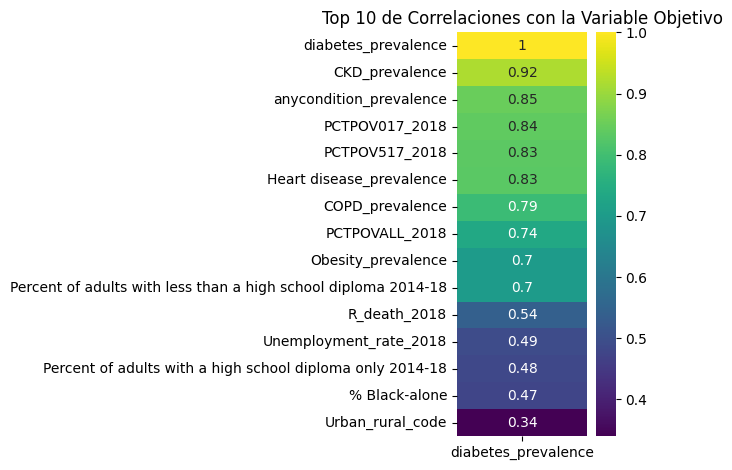

In [33]:
tr = dr.corr()['diabetes_prevalence'].sort_values(ascending= False).head(15)
banda = tr.to_frame()

sns.heatmap(banda, annot=True, cmap='viridis', cbar=True)
plt.title('Top 10 de Correlaciones con la Variable Objetivo')

plt.tight_layout()
plt.show()

### 2. Analisis Univariante

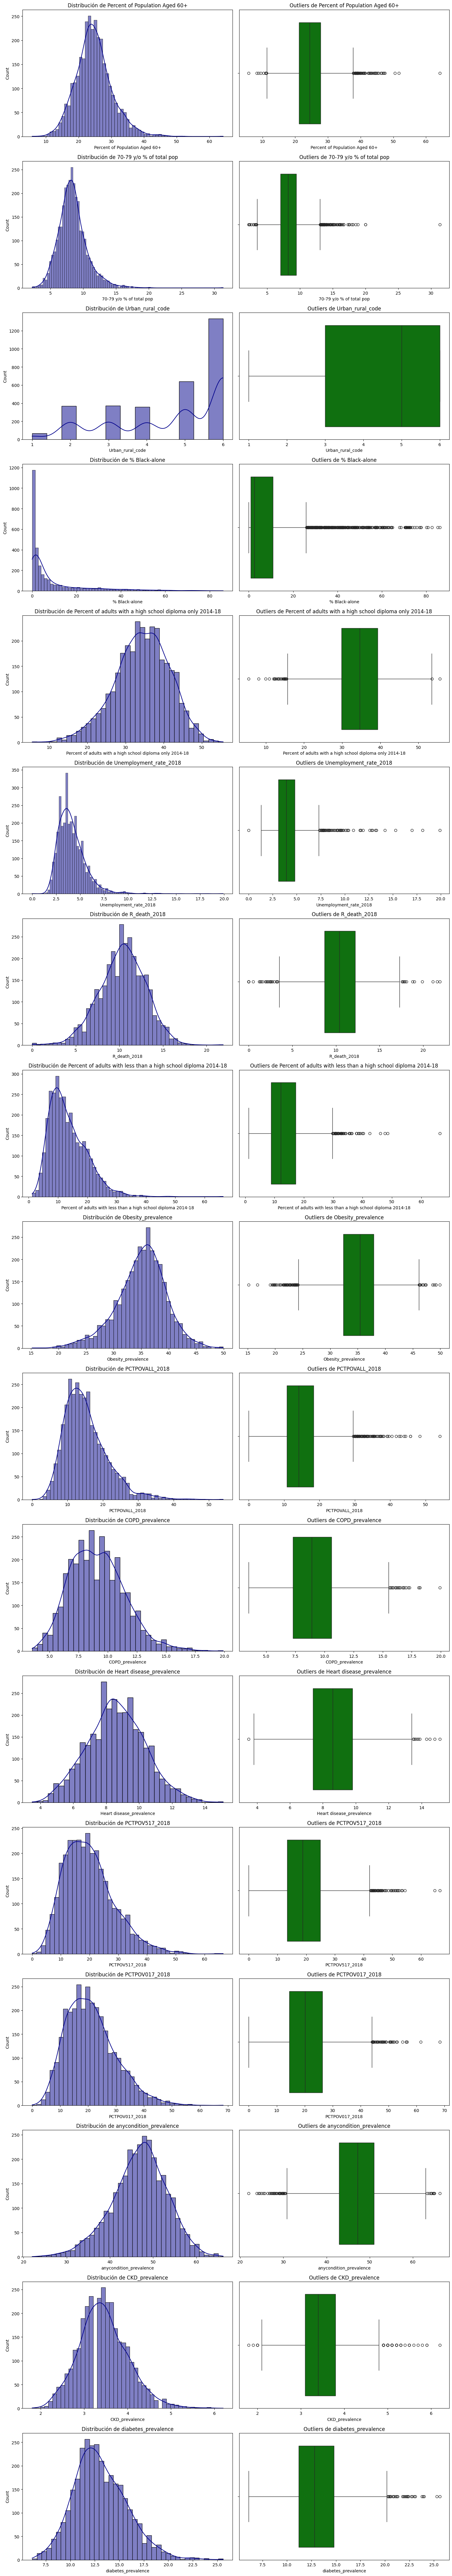

In [34]:
#Analisis Univariante de Variable Objetivo
uninum(dr)


In [39]:
dr['diabetes_prevalence'].describe()

count    3140.000000
mean       13.073503
std         2.724351
min         6.100000
25%        11.200000
50%        12.800000
75%        14.800000
max        25.600000
Name: diabetes_prevalence, dtype: float64

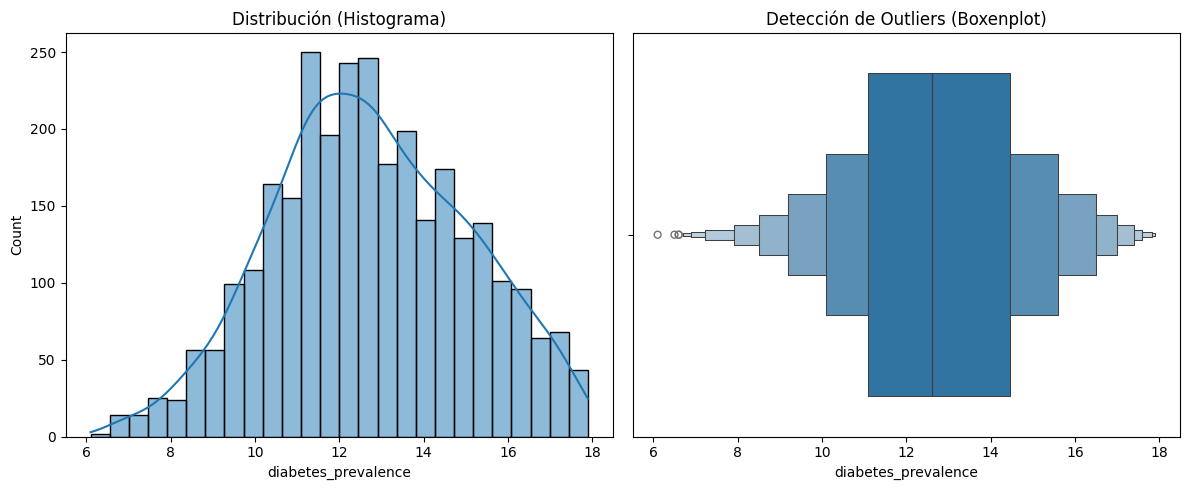

In [46]:
#Limpieza de Outliers de la Variable Objetivo
dr = dr.loc[dr['diabetes_prevalence'] <20]

#Verifiacion de Limpieza
fig, axis = plt.subplots(1,2, figsize=(12,5))

sns.histplot(dr['diabetes_prevalence'], ax=axis[0], kde=True)
axis[0].set_title('Distribución (Histograma)')

sns.boxenplot(x=dr['diabetes_prevalence'], ax=axis[1])
axis[1].set_title('Detección de Outliers (Boxenplot)')

plt.tight_layout()
plt.show()

### 2.1 Analisis Bivariante Numerico

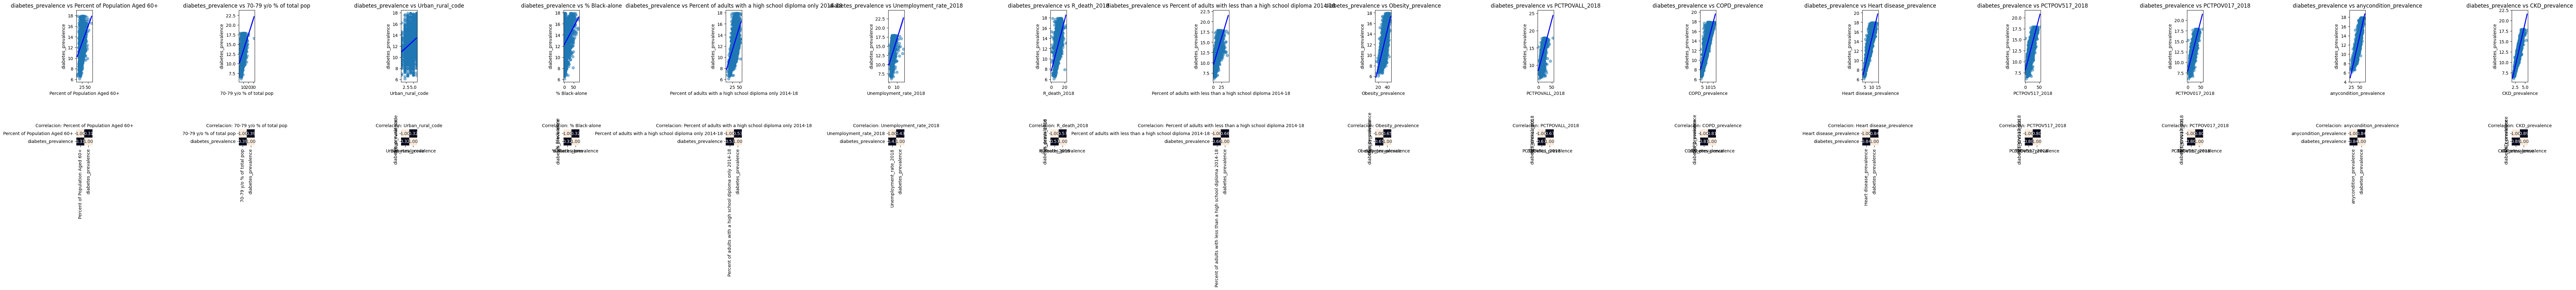

In [ ]:
binum(dr, 'diabetes_prevalence')

### 3. Analisis de Correlacion Multivariable

Text(0.5, 1.0, 'Matriz de Correlacion del Nuevo Dataset')

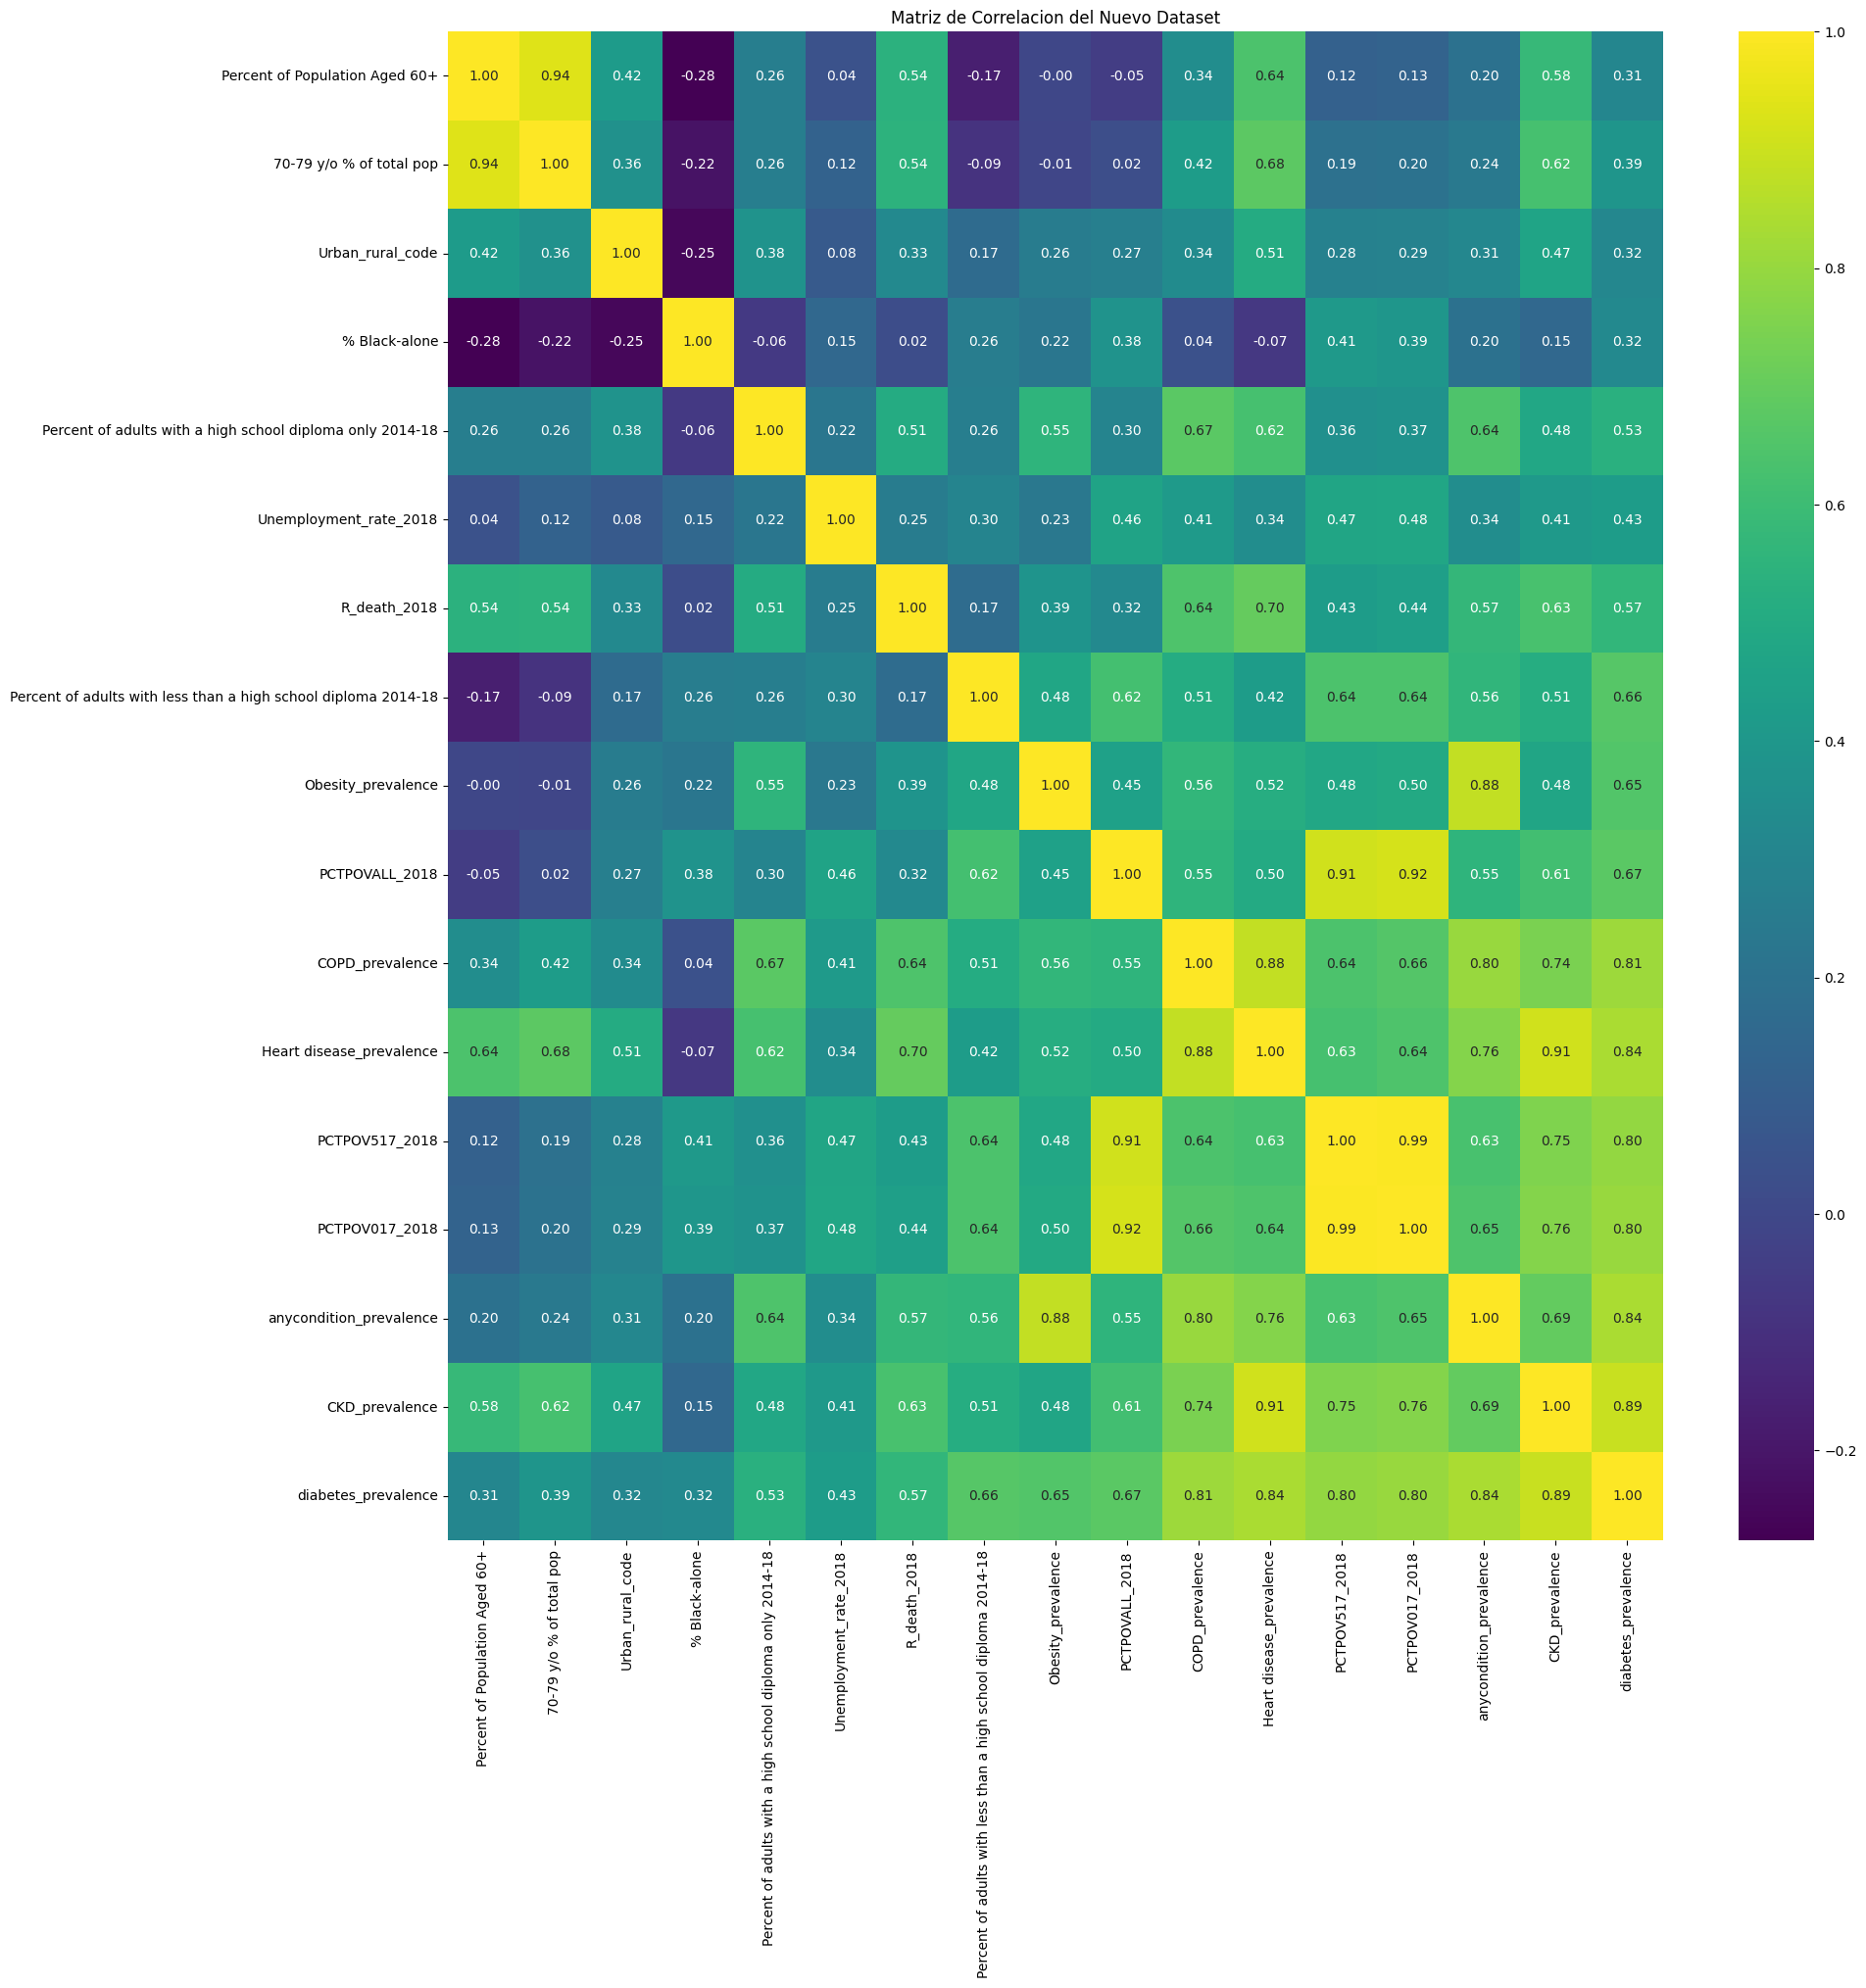

In [60]:
plt.figure(figsize=(20,20))
sns.heatmap(dr.corr(), annot= True, fmt='.2f', cmap='viridis')
plt.title('Matriz de Correlacion del Nuevo Dataset')

### 4. Ingenieria de Caracteristicas (Escalado)

In [50]:
scaler = StandardScaler()

scaled = scaler.fit_transform(dr)
total_df_scaled = pd.DataFrame(scaled, index= dr.index, columns= dr.columns)

total_df_scaled.head()

,Percent of Population Aged 60+,70-79 y/o % of total pop,Urban_rural_code,% Black-alone,Percent of adults with a high school diploma only 2014-18,Unemployment_rate_2018,R_death_2018,Percent of adults with less than a high school diploma 2014-18,Obesity_prevalence,PCTPOVALL_2018,COPD_prevalence,Heart disease_prevalence,PCTPOV517_2018,PCTPOV017_2018,anycondition_prevalence,CKD_prevalence,diabetes_prevalence
0,-1.010541,-0.496420,-1.040371,1.003094,-0.212363,-0.306584,-0.250856,-0.271063,0.268096,-0.129962,-0.151718,-0.343147,0.075333,-0.106364,0.222926,-0.565019,0.070246
1,0.282056,0.554803,-0.383561,0.091647,-0.905372,-0.306584,0.012989,-0.543869,-1.158074,-0.881019,-0.151718,-0.402732,-0.756577,-0.794618,-1.002859,-0.364418,-0.316523
3,-0.651487,-0.311478,-1.697180,1.144937,1.825083,-0.021481,0.427604,0.666708,0.946112,1.372152,0.473014,0.073947,0.959238,0.976998,0.885512,-0.163816,0.585938
4,-0.202668,0.066310,-1.697180,-0.530553,-0.018321,-0.377860,0.427604,1.178220,-0.152741,-0.242621,0.696133,0.431456,-0.444610,-0.272055,0.007585,0.036785,0.328092
7,-0.220621,-0.236553,-0.383561,1.131367,-0.240084,0.477450,1.068371,0.513255,1.460468,0.940294,0.562262,0.371871,0.673269,0.811308,1.216805,0.437987,0.843784


### 5. Seleccion de Caracteristicas

In [54]:
X = total_df_scaled.drop(columns='diabetes_prevalence')
y = total_df_scaled['diabetes_prevalence']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

sm = SelectKBest(f_regression, k=8)
sm.fit(X_train, y_train)

sf = sm.get_support(indices=True)

X_train_sel = pd.DataFrame(sm.transform(X_train), columns= X_train.columns[sf])
X_test_sel = pd.DataFrame(sm.transform(X_test), columns= X_test.columns[sf])

X_train_sel.head()

,Percent of adults with less than a high school diploma 2014-18,PCTPOVALL_2018,COPD_prevalence,Heart disease_prevalence,PCTPOV517_2018,PCTPOV017_2018,anycondition_prevalence,CKD_prevalence
0,-0.526819,-1.425536,-0.731826,-0.879411,-1.575488,-1.533854,-0.555613,-1.166822
1,-0.646171,-0.374056,-0.464083,-0.700656,-0.639589,-0.641673,-1.549492,-0.565019
2,-1.191784,-0.824690,-1.267310,-0.819826,-1.211528,-1.164236,-0.472790,-0.765620
3,-1.208834,-0.993678,-0.597955,0.014362,-0.821570,-0.896582,-0.240884,0.036785
4,-0.833726,-0.186291,-0.151718,0.252701,0.387300,0.275999,-0.920035,0.437987


In [55]:
X_train_sel['diabetes_prevalence'] = list(y_train) 
X_test_sel['diabetes_prevalence'] = list(y_test)

X_train_sel.to_excel('/workspaces/P17-Regresion-Lineal-Regularizada/data/processed/clean-train-data.xlsx')
X_test_sel.to_excel('/workspaces/P17-Regresion-Lineal-Regularizada/data/processed/clean-test-data.xlsx')

X_test_sel.head()

,Percent of adults with less than a high school diploma 2014-18,PCTPOVALL_2018,COPD_prevalence,Heart disease_prevalence,PCTPOV517_2018,PCTPOV017_2018,anycondition_prevalence,CKD_prevalence,diabetes_prevalence
0,-0.185811,0.865189,-0.240965,-0.104808,0.595277,0.683853,0.670172,0.036785,0.414040
1,0.001743,0.470884,-0.240965,-0.045223,0.231317,0.237763,-0.257449,0.237386,-0.058677
2,-1.498691,-1.688406,-1.892042,-1.832769,-1.783466,-1.801509,-1.963609,-1.969227,-1.949548
3,-0.032357,0.114131,1.097746,1.623153,0.829252,0.734835,0.935206,1.641594,1.531373
4,-0.219912,0.414554,-0.151718,-0.223978,0.192321,0.161290,-0.423096,-0.364418,-0.531395


### 6. Entrenamiento del Modelo

In [56]:
train = pd.read_excel('/workspaces/P17-Regresion-Lineal-Regularizada/data/processed/clean-train-data.xlsx')
test = pd.read_excel('/workspaces/P17-Regresion-Lineal-Regularizada/data/processed/clean-test-data.xlsx')

Xtrain = train.drop(columns=['diabetes_prevalence', 'Unnamed: 0'])
ytrain = train['diabetes_prevalence']

Xtest = test.drop(columns=['diabetes_prevalence', 'Unnamed: 0'])
ytest = test['diabetes_prevalence']

Xtrain.head()


,Percent of adults with less than a high school diploma 2014-18,PCTPOVALL_2018,COPD_prevalence,Heart disease_prevalence,PCTPOV517_2018,PCTPOV017_2018,anycondition_prevalence,CKD_prevalence
0,-0.526819,-1.425536,-0.731826,-0.879411,-1.575488,-1.533854,-0.555613,-1.166822
1,-0.646171,-0.374056,-0.464083,-0.700656,-0.639589,-0.641673,-1.549492,-0.565019
2,-1.191784,-0.824690,-1.267310,-0.819826,-1.211528,-1.164236,-0.472790,-0.765620
3,-1.208834,-0.993678,-0.597955,0.014362,-0.821570,-0.896582,-0.240884,0.036785
4,-0.833726,-0.186291,-0.151718,0.252701,0.387300,0.275999,-0.920035,0.437987


In [ ]:
#Entrenamiento del Modelo
model = Lasso(alpha=0.01, max_iter=100)
model.fit(Xtrain, ytrain)


,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.01
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",100
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [58]:
#Prediccion del Modelo
ypred = model.predict(Xtest)
ypred

array([ 2.40383793e-01,  3.54873408e-02, -2.05824768e+00,  1.21145084e+00,
       -3.14067628e-01,  3.21755993e-01, -8.16176502e-02,  4.04855199e-01,
        1.41328110e+00,  7.27418829e-01,  3.91277756e-03, -9.87424155e-01,
       -1.95137252e-01, -4.67446874e-01, -1.14881858e+00,  3.26069002e-01,
        5.65431737e-01, -8.78487022e-01, -2.54531257e-01,  9.40054156e-01,
        1.12278983e+00, -9.29611310e-01, -9.97819900e-01,  3.47885013e-01,
       -1.94315447e+00, -9.93506531e-01,  1.43274066e+00, -1.33550812e+00,
       -1.46932112e+00,  9.95965052e-01, -2.22174956e-01, -1.61800637e+00,
        7.65446538e-02,  8.76186529e-01, -1.46721953e-01,  6.15062596e-01,
        1.83787644e+00, -4.67643204e-01,  2.41435919e-01,  2.20337409e-01,
        7.53930412e-02,  7.68953977e-01,  1.13966374e+00,  3.39147959e-01,
       -7.74253505e-01,  8.99939423e-01,  8.87788992e-01,  7.44854005e-03,
       -1.05495600e-01,  1.95346456e+00, -2.13492246e+00, -3.76740786e-01,
        1.06265051e+00, -

In [59]:
#Evaluacion del modelo

Metrics ={ 
        'Error Cuadratico Medio (MSE)': mean_squared_error(ytest, ypred),
        'Raiz del Error Cuadratico Medio (RMSE)': root_mean_squared_error(ytest, ypred),
        'Coeficiente de Determinacion R2': r2_score(ytest, ypred)
}

print(f'El entrenamiento del modelo arrojo los siguientes resultados', Metrics)

El entrenamiento del modelo arrojo los siguientes resultados {'Error Cuadratico Medio (MSE)': 0.08537595402208424, 'Raiz del Error Cuadratico Medio (RMSE)': 0.2921916392063336, 'Coeficiente de Determinacion R2': 0.9185501339895338}


### 7. Evaluacion de Sobreajuste del Modelo

In [ ]:
alpha = [0.01, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]



### 8. Optimizacion del Modelo con GridSearchCV

hyper = {
    'C': [0.1, 1, 10, 100, 1000],
    'l1_ratio':[0,1],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag'],
    'max_iter': [25,50,75,100]
}

grid = GridSearchCV(model, hyper, scoring='accuracy', cv=10)
grid